<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prophet" data-toc-modified-id="Prophet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prophet</a></span></li><li><span><a href="#S1" data-toc-modified-id="S1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>S1</a></span></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RMSE</a></span></li><li><span><a href="#S2" data-toc-modified-id="S2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>S2</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
output_intermediate_pth = "../output_intermediate/ML_Optimization"

In [3]:
output_intermediate = '../output_intermediate'

# Prophet

In [4]:
# prophet
pp_fn = os.path.join(output_intermediate, 'prophet')
rmse_pp = pd.DataFrame()
col = 'RMSE_val'
for file in os.listdir(pp_fn):
    if ('.' not in file) or ('~' in file) or 'json' in file: continue
    name = file[:-4].split('_')[-1]
    tmp = pd.read_csv(os.path.join(pp_fn, file), index_col=0)[[col]]
    tmp.columns = [f'{col}_{name}']
    rmse_pp = pd.concat([rmse_pp, tmp], axis=1)
#     break
rmse_pp = rmse_pp.round(2)
rmse_pp_min = rmse_pp.min(axis=1)
rmse_pp_min

S_Ox        5.92
S_NO2       5.54
S_O3        6.56
N_Ox        6.65
W_NO2       7.73
O_NO2       8.40
N_NO2       8.72
N_O3       10.17
N_PM10K     9.94
D_NO2      10.54
W_PM10K    10.43
S_PM10K    10.32
D_PM10K    12.48
O_PM10K    15.73
dtype: float64

# S1

# RMSE

In [5]:
# rf
rf_fn = os.path.join(output_intermediate_pth, 'rf/old_data')
rf_old_rmse = pd.DataFrame()
col = 'rmse_val'
for file in os.listdir(rf_fn):
    if ('~' in file) or ('.' not in file): continue
    dt = pd.read_csv(os.path.join(rf_fn, file), index_col=0)
    rf_old_rmse = pd.concat([rf_old_rmse, dt[[c for c in dt.columns if col in c.lower()]]], axis=1)
rf_old_rmse.columns = [c[:13] for c in rf_old_rmse.columns]
rf_old_rmse = rf_old_rmse.round(2)
rf_old_min = rf_old_rmse.min(axis=1)


# rf
rf_fn = os.path.join(output_intermediate_pth, 'rf/new_data')
rf_new_rmse = pd.DataFrame()
col = 'rmse_val'
for file in os.listdir(rf_fn):
    if ('~' in file) or ('.' not in file): continue
    dt = pd.read_csv(os.path.join(rf_fn, file), index_col=0)
    rf_new_rmse = pd.concat([rf_new_rmse, dt[[c for c in dt.columns if col in c.lower()]]], axis=1)
rf_new_rmse.columns = [c[:13] for c in rf_new_rmse.columns]
rf_new_rmse = rf_new_rmse.round(2)
rf_new_min = rf_new_rmse.min(axis=1)
rf_new_min

D_NO2       8.94
D_PM10K    11.08
N_NO2       6.17
N_O3        9.30
N_Ox        5.87
N_PM10K     6.32
O_NO2       6.92
O_PM10K    14.31
S_NO2       6.12
S_O3        5.56
S_Ox       10.63
S_PM10K     8.63
W_NO2       5.60
W_PM10K     7.45
dtype: float64

In [6]:
rf_min = pd.concat([rf_old_min, rf_new_min], axis=1)
rf_min.columns = ['old', 'new']
rf_min

,old,new
D_NO2,8.98,8.94
D_PM10K,11.14,11.08
N_NO2,6.17,6.17
N_O3,9.29,9.30
N_Ox,6.00,5.87
N_PM10K,6.79,6.32
O_NO2,6.90,6.92
O_PM10K,14.45,14.31
S_NO2,6.14,6.12
S_O3,5.65,5.56


<AxesSubplot:>

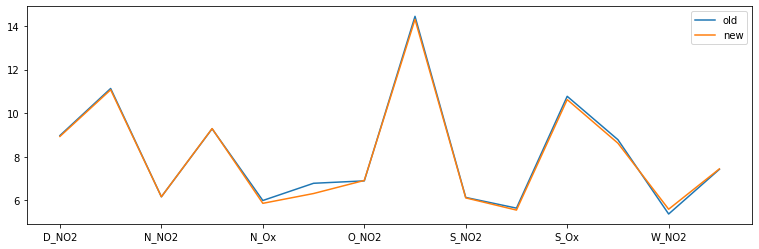

In [7]:
rf_min.plot(figsize=(13, 4))

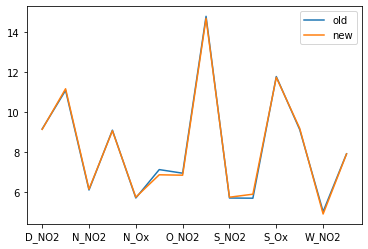

In [8]:
xgb_fn = os.path.join(output_intermediate_pth, 'xgb/old')
rmse_old_xgb = pd.DataFrame()
col = 'RMSE'
for file in os.listdir(xgb_fn):
    if ('~' in file) or ('.' not in file): continue
    name = file.split('_')[-1][:-4]
    dt = pd.read_csv(os.path.join(xgb_fn, file), index_col=0)
    dt = dt.loc[[c for c in dt.index if col in c]].min()
    dt.name = f'RMSE_{name}'
    rmse_old_xgb = pd.concat([rmse_old_xgb, dt], axis=1)
#     break
# rmse_old_xgb.columns = [c[:13] for c in rmse_old_xgb.columns]
rmse_old_xgb = rmse_old_xgb.round(2)
rmse_old_xgb = rmse_old_xgb[sorted(rmse_old_xgb.columns)]
rmse_old_xgb.sort_index(inplace=True)
rmse_old_xgb_min = rmse_old_xgb.min(axis=1)


xgb_fn = os.path.join(output_intermediate_pth, 'xgb/new')
rmse_new_xgb = pd.DataFrame()
col = 'RMSE'
for file in os.listdir(xgb_fn):
    if ('~' in file) or ('.' not in file): continue
    name = file.split('_')[-1][:-4]
    dt = pd.read_csv(os.path.join(xgb_fn, file), index_col=0)
    dt = dt.loc[[c for c in dt.index if col in c]].min()
    dt.name = f'RMSE_{name}'
    rmse_new_xgb = pd.concat([rmse_new_xgb, dt], axis=1)
#     break
# rmse_new_xgb.columns = [c[:13] for c in rmse_new_xgb.columns]
rmse_new_xgb = rmse_new_xgb.round(2)
rmse_new_xgb = rmse_new_xgb[sorted(rmse_new_xgb.columns)]
rmse_new_xgb.sort_index(inplace=True)
rmse_new_xgb_min = rmse_new_xgb.min(axis=1)


xgb_min = pd.concat([rmse_old_xgb_min, rmse_new_xgb_min], axis=1)
xgb_min.columns = ['old', 'new']
xgb_min.plot();

In [9]:
ex_fn = os.path.join(output_intermediate_pth, 'extree')
rmse_new_ex = pd.DataFrame()
col = 'RMSE'
for file in os.listdir(ex_fn):
    if '~' in file: continue
    name = file.split('_')[-1][:-4]
    dt = pd.read_csv(os.path.join(ex_fn, file), index_col=0)
    dt = dt.loc[[c for c in dt.index if col in c]].min()
    dt.name = f'RMSE_{name}'
    rmse_new_ex = pd.concat([rmse_new_ex, dt], axis=1)
rmse_new_ex = rmse_new_ex.round(2)    
rmse_new_ex_min = rmse_new_ex.min(axis=1)
rmse_new_ex_min

D_NO2       9.26
N_NO2       6.87
O_NO2       7.36
S_NO2       6.33
W_NO2       5.64
D_PM10K    11.49
N_PM10K     7.04
O_PM10K    14.41
S_PM10K     9.17
W_PM10K     7.74
N_O3       10.16
S_O3        5.90
N_Ox        6.11
S_Ox       11.88
dtype: float64

In [10]:
rmse_new_ex.idxmin(axis=1)

D_NO2      RMSE_0.82
N_NO2       RMSE_1.0
O_NO2      RMSE_0.92
S_NO2      RMSE_0.83
W_NO2      RMSE_0.94
D_PM10K     RMSE_0.9
N_PM10K     RMSE_1.0
O_PM10K    RMSE_0.99
S_PM10K    RMSE_0.91
W_PM10K    RMSE_0.95
N_O3       RMSE_0.94
S_O3        RMSE_1.0
N_Ox        RMSE_0.8
S_Ox       RMSE_0.81
dtype: object

In [11]:
# prophet
pp_fn = '../output_intermediate/prophet'
rmse_pp = pd.DataFrame()
col = 'RMSE_val'
for file in os.listdir(pp_fn):
    if ('.' not in file) or ('~' in file) or 'json' in file: continue
    name = file[:-4].split('_')[-1]
    tmp = pd.read_csv(os.path.join(pp_fn, file), index_col=0)[[col]]
    tmp.columns = [f'{col}_{name}']
    rmse_pp = pd.concat([rmse_pp, tmp], axis=1)
#     break
rmse_pp = rmse_pp.round(2)
rmse_pp_min = rmse_pp.min(axis=1)
rmse_pp_min

S_Ox        5.92
S_NO2       5.54
S_O3        6.56
N_Ox        6.65
W_NO2       7.73
O_NO2       8.40
N_NO2       8.72
N_O3       10.17
N_PM10K     9.94
D_NO2      10.54
W_PM10K    10.43
S_PM10K    10.32
D_PM10K    12.48
O_PM10K    15.73
dtype: float64

In [12]:
base = pd.DataFrame([7.43, 9.04, 5.3, 6.76, 7.19, 7.09, 7.63, 13.44, 7.26, 6.43, 11.92, 8.52, 4.74, 8.11],
                     index=sorted(rmse_new_ex_min.index), columns=['RMSE_base']
                    )
base['rf_s1'] = rf_new_min
base['xgb_s1'] = rmse_new_xgb_min
base['ex_s1'] = rmse_new_ex_min
base['pp_s1'] = rmse_pp_min

base['rf1_better?'] = base['rf_s1'] < base['RMSE_base']
base['xgb_s1_better?'] = base['xgb_s1'] < base['RMSE_base']
base['ex_s1_better?'] = base['ex_s1'] < base['RMSE_base']
base['pp_s1_better?'] = base['pp_s1'] < base['RMSE_base']
base['s1_better?'] = base['xgb_s1_better?'] | base['rf1_better?'] | base['ex_s1_better?'] | base['pp_s1_better?']
base['best'] = np.round(base.iloc[:, 1:5].min(axis=1), 2)
# base['ratio'] = base['best']/base['RMSE_base']
base

,RMSE_base,rf_s1,xgb_s1,ex_s1,pp_s1,rf1_better?,xgb_s1_better?,ex_s1_better?,pp_s1_better?,s1_better?,best
D_NO2,7.43,8.94,9.15,9.26,10.54,False,False,False,False,False,8.94
D_PM10K,9.04,11.08,11.18,11.49,12.48,False,False,False,False,False,11.08
N_NO2,5.30,6.17,6.16,6.87,8.72,False,False,False,False,False,6.16
N_O3,6.76,9.30,9.08,10.16,10.17,False,False,False,False,False,9.08
N_Ox,7.19,5.87,5.76,6.11,6.65,True,True,True,True,True,5.76
N_PM10K,7.09,6.32,6.88,7.04,9.94,True,True,True,False,True,6.32
O_NO2,7.63,6.92,6.86,7.36,8.40,True,True,True,False,True,6.86
O_PM10K,13.44,14.31,14.70,14.41,15.73,False,False,False,False,False,14.31
S_NO2,7.26,6.12,5.76,6.33,5.54,True,True,True,True,True,5.54
S_O3,6.43,5.56,5.91,5.90,6.56,True,True,True,False,True,5.56


In [13]:
base[~base['s1_better?']][['RMSE_base', 'rf_s1', 'xgb_s1', 'ex_s1', 'best']]

,RMSE_base,rf_s1,xgb_s1,ex_s1,best
D_NO2,7.43,8.94,9.15,9.26,8.94
D_PM10K,9.04,11.08,11.18,11.49,11.08
N_NO2,5.30,6.17,6.16,6.87,6.16
N_O3,6.76,9.30,9.08,10.16,9.08
O_PM10K,13.44,14.31,14.70,14.41,14.31
S_PM10K,8.52,8.63,9.20,9.17,8.63
W_NO2,4.74,5.60,4.92,5.64,4.92


In [14]:
print(base['s1_better?'].sum())

7


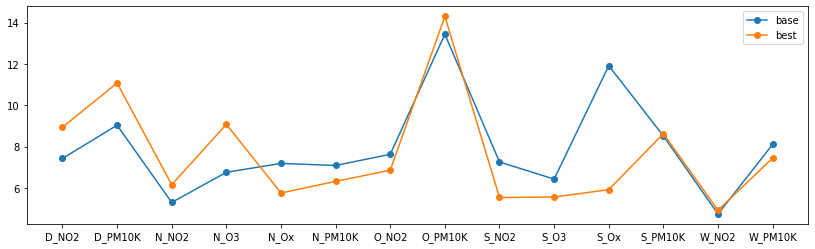

In [15]:
x = base.index
plt.figure(figsize=(14, 4))
plt.plot(x, base['RMSE_base'], marker='o', label='base')
plt.plot(x, base['best'], marker='o', label='best')
plt.xticks(x, x.values)
plt.legend()
plt.show();

In [16]:
import plotly.express as px

In [ ]:
fig = px.line(base[['RMSE_base', 'best']])
fig.update_traces(mode='lines+markers')
fig.update_layout(width=950, height=400)
fig.show();

In [18]:
base.to_csv('first_runs.csv')

# S2

In [19]:
xgb_fn_2 = os.path.join(output_intermediate_pth, 'xgb_1year')
rmse_xgb_2 = pd.DataFrame()
col = 'RMSE'
for file in os.listdir(xgb_fn_2):
    if '~' in file: continue
    name = file.split('_')[-1][:-4]
    dt = pd.read_csv(os.path.join(xgb_fn_2, file), index_col=0)
    dt = dt.loc[[c for c in dt.index if col in c]].min()
    dt.name = f'RMSE_{name}'
    rmse_xgb_2 = pd.concat([rmse_xgb_2, dt], axis=1)
#     break
# rmse_xgb.columns = [c[:13] for c in rmse_xgb.columns]
rmse_xgb_2

,RMSE_0.87,RMSE_0.92,RMSE_0.91,RMSE_0.94,RMSE_0.82,RMSE_0.9,RMSE_0.96,RMSE_0.83,RMSE_0.81,RMSE_0.98,...,RMSE_0.95,RMSE_0.84,RMSE_0.8,RMSE_1,RMSE_0.86,RMSE_0.88,RMSE_0.99,RMSE_0.97,RMSE_0.85,RMSE_0.89
D_NO2,9.826552,9.981433,9.956524,10.042737,9.612110,9.909535,10.169075,9.653626,9.586970,10.322851,...,10.146397,9.697477,9.565636,10.557664,9.757646,9.823872,10.392209,10.244711,9.717495,9.872097
N_NO2,5.426042,5.405715,5.370311,5.460469,5.587648,5.415567,5.526639,5.512340,5.603727,5.597241,...,5.411099,5.438038,5.641945,5.642249,5.401635,5.363806,5.523060,5.486493,5.432670,5.481990
O_NO2,7.778169,7.996731,7.956281,8.003236,7.698237,7.955760,7.997959,7.700192,7.684283,8.108147,...,8.020415,7.739762,7.689692,8.196434,7.762111,7.827119,8.319431,8.101915,7.774843,7.919695
S_NO2,6.924077,7.468577,7.312010,7.567011,6.625458,7.223692,7.870948,6.715065,6.614181,8.162777,...,7.817883,6.702100,6.565952,8.463862,6.876213,7.051688,8.253010,8.148626,6.759379,7.178389
W_NO2,5.669457,5.726407,5.718120,5.770928,5.778120,5.702204,5.739320,5.720018,5.827501,5.892845,...,5.787085,5.713639,5.859471,5.948045,5.690775,5.688790,5.899866,5.851355,5.672947,5.685529
D_PM10K,9.517449,9.758340,9.688997,9.904934,9.401476,9.666598,10.019326,9.418374,9.374446,10.311333,...,9.933013,9.423890,9.336510,10.505041,9.491107,9.565753,10.004697,10.119245,9.467176,9.603074
N_PM10K,6.728360,6.794368,6.730285,6.748831,6.798582,6.800451,6.754257,6.793202,6.794598,6.805395,...,6.828954,6.750580,6.879193,6.813473,6.759046,6.727661,6.785478,6.765372,6.737831,6.787635
O_PM10K,9.542957,9.415023,9.626544,9.597055,9.502411,9.433954,9.508706,9.409585,9.713578,9.821365,...,9.498384,9.450724,9.555386,9.807503,9.454079,9.461786,9.794219,9.680881,9.394969,9.556983
S_PM10K,9.233253,9.591818,9.516919,9.870417,8.967469,9.378613,10.167969,9.030812,8.907504,10.279134,...,10.001763,9.023601,8.887012,10.285435,9.114443,9.233211,10.294849,10.150433,9.095721,9.357023
W_PM10K,7.533573,7.612297,7.638885,7.646660,7.569541,7.585728,7.753548,7.548091,7.552320,7.823517,...,7.716615,7.554627,7.570007,7.870011,7.532347,7.563142,7.890940,7.829370,7.564211,7.559761


In [20]:
rmse_xgb_2_min = rmse_xgb_2.min(axis=1)
rmse_xgb_2_min

D_NO2       9.565636
N_NO2       5.340122
O_NO2       7.684283
S_NO2       6.565952
W_NO2       5.669457
D_PM10K     9.336510
N_PM10K     6.679182
O_PM10K     9.394969
S_PM10K     8.887012
W_PM10K     7.532347
N_O3        9.661184
S_O3        7.595790
N_Ox        8.125144
S_Ox       10.140085
dtype: float64

In [21]:
base['xgb_s2'] = rmse_xgb_2_min
base['s2_better?'] = base['xgb_s2'] < base['RMSE_base']
base

,RMSE_base,rf_s1,xgb_s1,ex_s1,pp_s1,rf1_better?,xgb_s1_better?,ex_s1_better?,pp_s1_better?,s1_better?,best,xgb_s2,s2_better?
D_NO2,7.43,8.94,9.15,9.26,10.54,False,False,False,False,False,8.94,9.565636,False
D_PM10K,9.04,11.08,11.18,11.49,12.48,False,False,False,False,False,11.08,9.336510,False
N_NO2,5.30,6.17,6.16,6.87,8.72,False,False,False,False,False,6.16,5.340122,False
N_O3,6.76,9.30,9.08,10.16,10.17,False,False,False,False,False,9.08,9.661184,False
N_Ox,7.19,5.87,5.76,6.11,6.65,True,True,True,True,True,5.76,8.125144,False
N_PM10K,7.09,6.32,6.88,7.04,9.94,True,True,True,False,True,6.32,6.679182,True
O_NO2,7.63,6.92,6.86,7.36,8.40,True,True,True,False,True,6.86,7.684283,False
O_PM10K,13.44,14.31,14.70,14.41,15.73,False,False,False,False,False,14.31,9.394969,True
S_NO2,7.26,6.12,5.76,6.33,5.54,True,True,True,True,True,5.54,6.565952,True
S_O3,6.43,5.56,5.91,5.90,6.56,True,True,True,False,True,5.56,7.595790,False
